In [4]:
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import pandas as pd
from pathlib import Path 

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Path('../results/figures').mkdir(parents=True, exist_ok=True)

print("✔️ Imports completed!")

✔️ Imports completed!


In [5]:
with open('../results/baseline_results.json', 'r') as f:
    baseline_results = json.load(f)

with open('../results/multiquery_results.json', 'r') as f:
    mq_results = json.load(f)

print("Baseline (Standard Attention) results:")
print(json.dumps(baseline_results, indent=2))

print("\nMulti-Query Attention Results:")
print(json.dumps(mq_results, indent=2))

Baseline (Standard Attention) results:
{
  "model": "Standard Vision Transformer",
  "avg_error_pixels": 0.13387457425497015,
  "accuracy_percent": 100.0,
  "fps": 1375.1545871228764,
  "latency_ms": 0.7271909713745117,
  "num_parameters": 208418,
  "train_loss_final": 0.011222243264925724,
  "val_loss_final": 0.011568224380636156
}

Multi-Query Attention Results:
{
  "model": "Multi-Query Vision Transformer",
  "avg_error_pixels": 0.23999095026327638,
  "accuracy_percejt": 100.0,
  "fps": 1224.439131335955,
  "latency_ms": 0.8167004585266113,
  "num_parameters": 183458,
  "train_loss_final": 0.07507299403450927,
  "val_loss_final": 0.038015642394508914
}


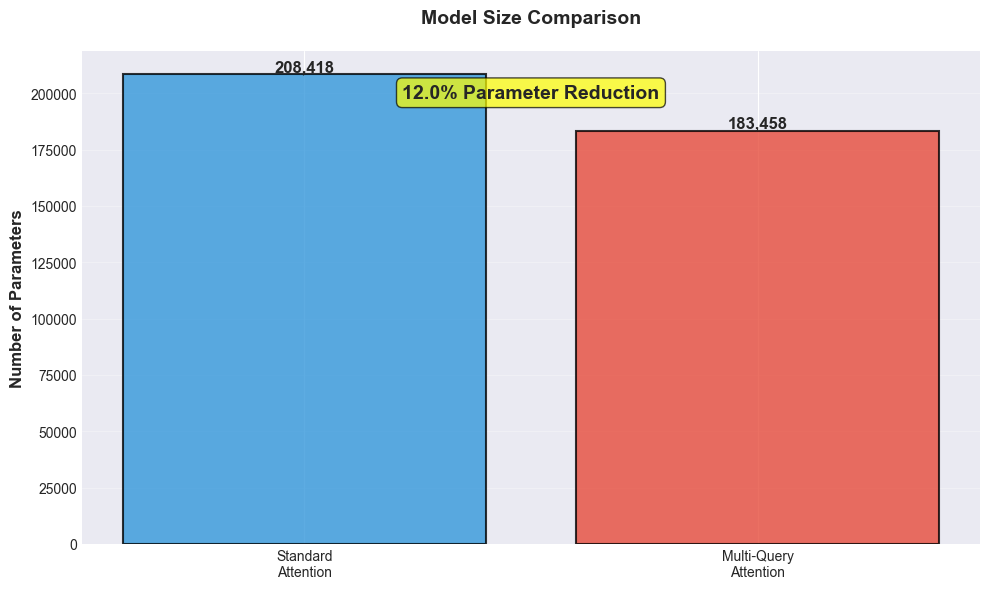

✔️ Parameter comparison chart saved!


In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Standard\nAttention', 'Multi-Query\nAttention']
params = [baseline_results['num_parameters'], mq_results['num_parameters']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, params, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar in bars: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
    f'{int(height):,}', 
    ha='center', va='bottom', fontsize=12, fontweight='bold')

param_reduction = (1 - params[1]/params[0]) * 100
ax.text(0.5, max(params) * 0.95,
        f'{param_reduction:.1f}% Parameter Reduction',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax.set_ylabel('Number of Parameters', fontsize=12, fontweight='bold')
ax.set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/parameter_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✔️ Parameter comparison chart saved!")


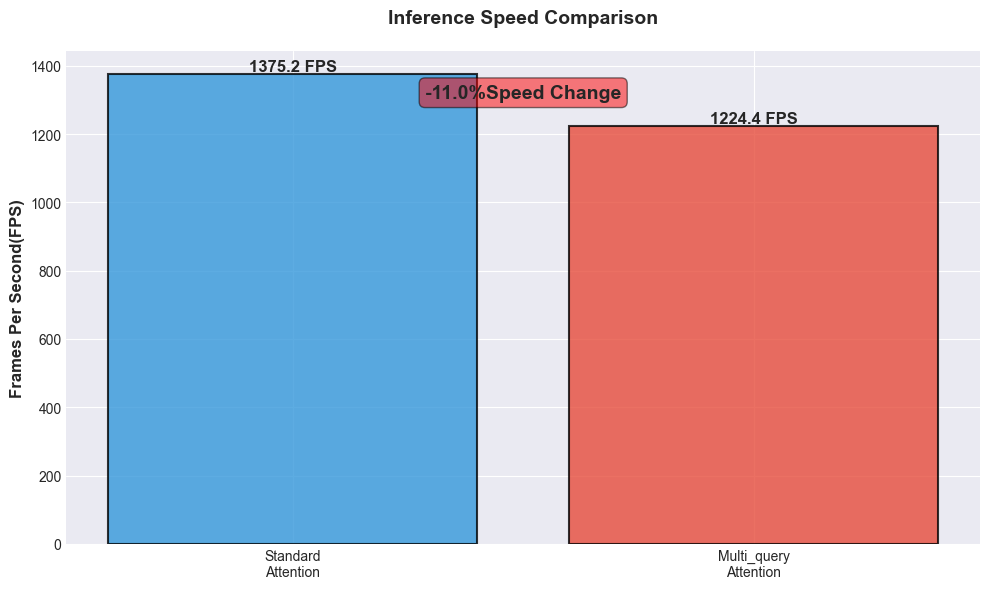

✔️ FPS comparison chart saved!


In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Standard\nAttention', 'Multi_query\nAttention']
fps_values = [baseline_results['fps'], mq_results['fps']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, fps_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, 
            f'{height:.1f} FPS',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

fps_improvement = ((fps_values[1] - fps_values[0]) / fps_values[0]) * 100
improvement_color = 'green' if fps_improvement > 0 else 'red'
ax.text(0.5, max(fps_values) * 0.95, 
        f'{fps_improvement:+.1f}%Speed Change',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=improvement_color, alpha=0.5))

ax.set_ylabel('Frames Per Second(FPS)', fontsize=12, fontweight='bold')
ax.set_title('Inference Speed Comparison', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/figures/fps_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✔️ FPS comparison chart saved!")
             

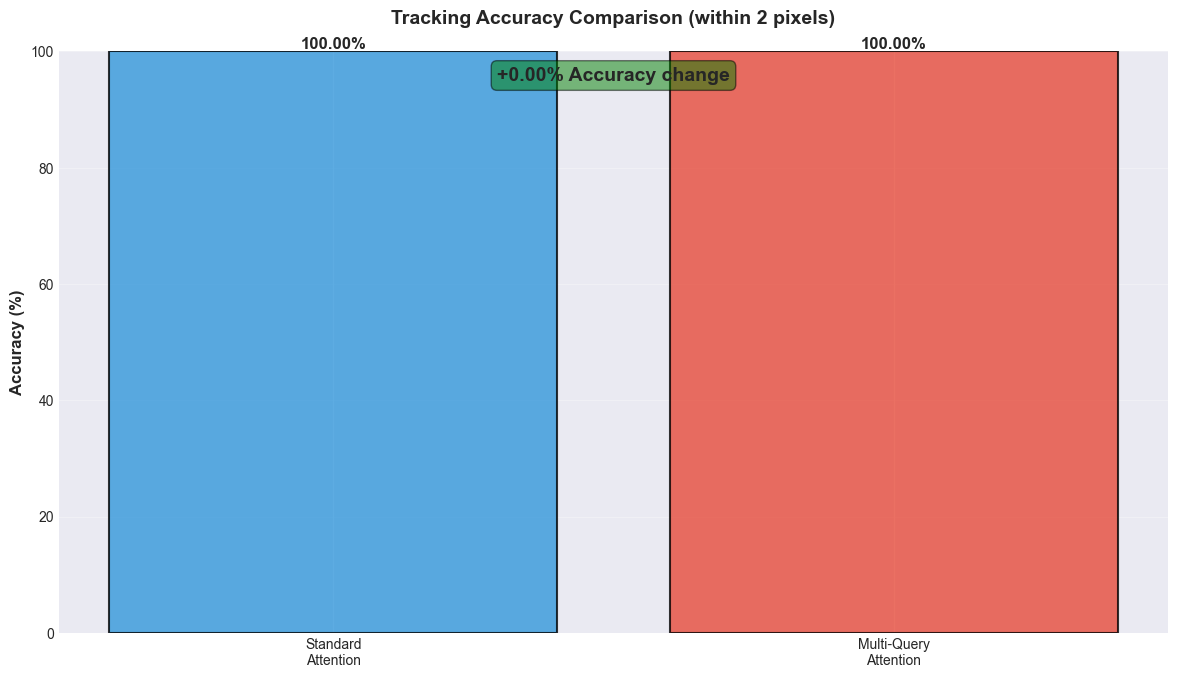

✔️Accuracy comparison chart saved!


In [17]:
fig, ax = plt.subplots(figsize=(12, 7))

models = ["Standard\nAttention", "Multi-Query\nAttention"]
accuracy_values = [baseline_results['accuracy_percent'], mq_results['accuracy_percejt']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, accuracy_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for bar in bars: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

accuracy_change = accuracy_values[1] - accuracy_values[0]
change_color = 'green' if accuracy_change >= 0 else 'red'
ax.text(0.5, max(accuracy_values) * 0.95,
        f'{accuracy_change:+.2f}% Accuracy change',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=change_color, alpha=0.5))

ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Tracking Accuracy Comparison (within 2 pixels)', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([0, 100])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout(pad=1.5)
plt.savefig('../results/figures/accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✔️Accuracy comparison chart saved!")
    

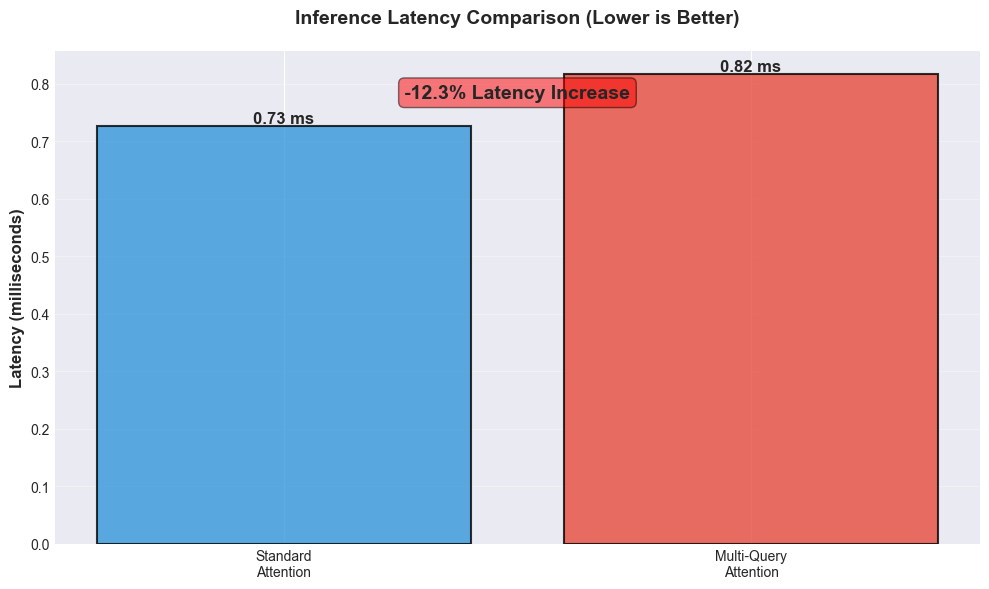

✓ Latency comparison chart saved!


In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Standard\nAttention', 'Multi-Query\nAttention']
latency_values = [baseline_results['latency_ms'], mq_results['latency_ms']]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(models, latency_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f} ms',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Calculate latency improvement (lower is better)
latency_improvement = ((latency_values[0] - latency_values[1]) / latency_values[0]) * 100
improvement_color = 'green' if latency_improvement > 0 else 'red'
ax.text(0.5, max(latency_values) * 0.95,
        f'{latency_improvement:+.1f}% Latency Reduction' if latency_improvement > 0 else f'{latency_improvement:.1f}% Latency Increase',
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=improvement_color, alpha=0.5))

ax.set_ylabel('Latency (milliseconds)', fontsize=12, fontweight='bold')
ax.set_title('Inference Latency Comparison (Lower is Better)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/latency_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Latency comparison chart saved!")

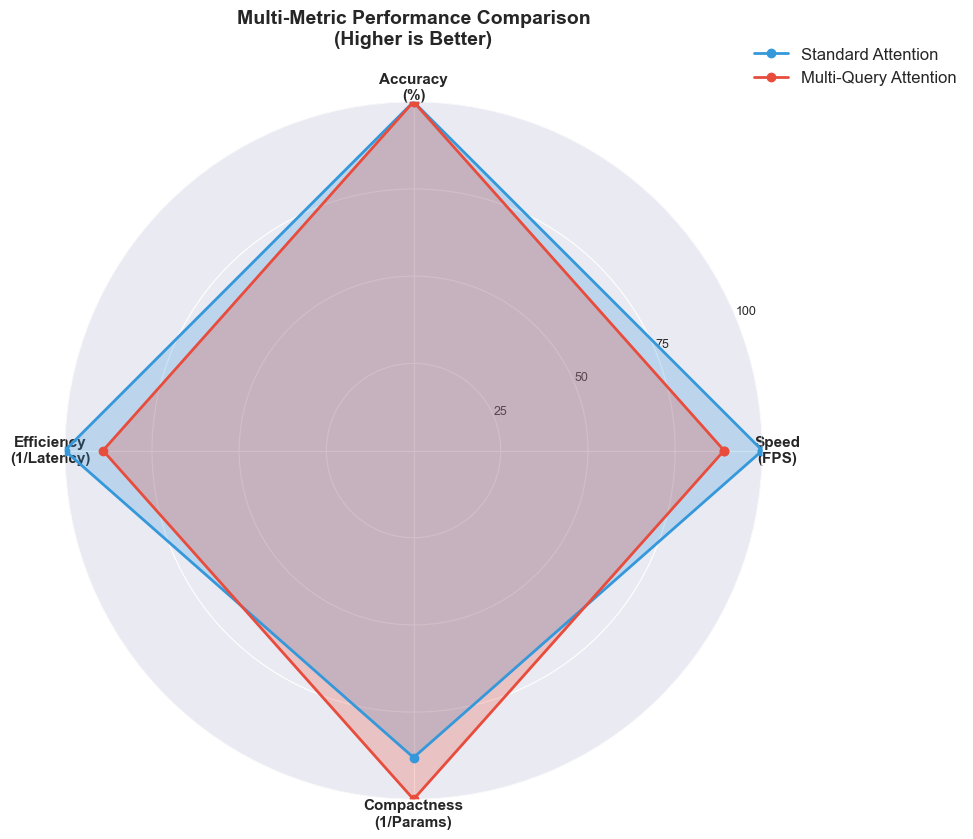

✓ Radar chart saved!


In [20]:
from math import pi

# Prepare data for radar chart (normalize to 0-100 scale)
categories = ['Speed\n(FPS)', 'Accuracy\n(%)', 'Efficiency\n(1/Latency)', 'Compactness\n(1/Params)']

# Normalize metrics to 0-100 scale
def normalize(value, max_val):
    return (value / max_val) * 100

max_fps = max(baseline_results['fps'], mq_results['fps'])
max_accuracy = 100  # Already in percentage
max_efficiency = max(1/baseline_results['latency_ms'], 1/mq_results['latency_ms'])
max_compactness = max(1/baseline_results['num_parameters'], 1/mq_results['num_parameters'])

baseline_values = [
    normalize(baseline_results['fps'], max_fps),
    baseline_results['accuracy_percent'],
    normalize(1/baseline_results['latency_ms'], max_efficiency),
    normalize(1/baseline_results['num_parameters'], max_compactness)
]

mq_values = [
    normalize(mq_results['fps'], max_fps),
    mq_results['accuracy_percejt'],
    normalize(1/mq_results['latency_ms'], max_efficiency),
    normalize(1/mq_results['num_parameters'], max_compactness)
]

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
baseline_values += baseline_values[:1]
mq_values += mq_values[:1]
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, baseline_values, 'o-', linewidth=2, label='Standard Attention', color='#3498db')
ax.fill(angles, baseline_values, alpha=0.25, color='#3498db')

ax.plot(angles, mq_values, 'o-', linewidth=2, label='Multi-Query Attention', color='#e74c3c')
ax.fill(angles, mq_values, alpha=0.25, color='#e74c3c')

# Fix axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_yticks([25, 50, 75, 100])
ax.set_yticklabels(['25', '50', '75', '100'], size=9)
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.title('Multi-Metric Performance Comparison\n(Higher is Better)', 
          size=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/figures/radar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Radar chart saved!")

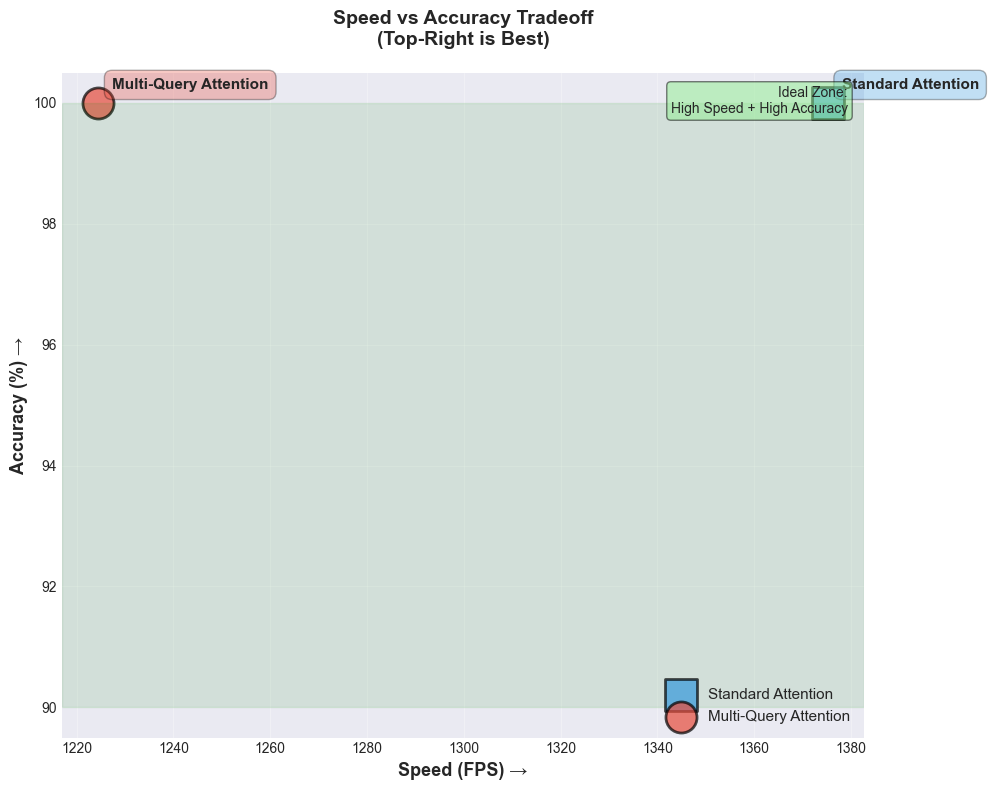

✓ Tradeoff chart saved!


In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot both models
models_data = [
    ('Standard Attention', baseline_results['fps'], baseline_results['accuracy_percent'], '#3498db', 's'),
    ('Multi-Query Attention', mq_results['fps'], mq_results['accuracy_percejt'], '#e74c3c', 'o')
]

for name, fps, accuracy, color, marker in models_data:
    ax.scatter(fps, accuracy, s=500, c=color, marker=marker, 
               edgecolors='black', linewidth=2, alpha=0.7, label=name)
    ax.annotate(name, (fps, accuracy), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3))

ax.set_xlabel('Speed (FPS) →', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy (%) →', fontsize=13, fontweight='bold')
ax.set_title('Speed vs Accuracy Tradeoff\n(Top-Right is Best)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

# Add target zone annotation
ax.axhspan(90, 100, alpha=0.1, color='green', label='Target Accuracy')
ax.text(0.98, 0.98, 'Ideal Zone:\nHigh Speed + High Accuracy', 
        transform=ax.transAxes, fontsize=10, 
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('../results/figures/speed_accuracy_tradeoff.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Tradeoff chart saved!")

In [24]:
# Create detailed comparison dataframe
comparison_data = {
    'Metric': [
        'Model Architecture',
        'Total Parameters',
        'Embedding Dimension',
        'Number of Heads',
        'Depth (Layers)',
        '',
        'Average Error (pixels)',
        'Accuracy (within 2px)',
        'Training Loss (final)',
        'Validation Loss (final)',
        '',
        'Inference Speed (FPS)',
        'Latency (ms)',
        '',
        'Parameter Reduction',
        'Speed Change',
        'Accuracy Change'
    ],
    'Standard Attention': [
        'Vision Transformer',
        f"{baseline_results['num_parameters']:,}",
        '64',
        '4',
        '4',
        '',
        f"{baseline_results['avg_error_pixels']:.2f}",
        f"{baseline_results['accuracy_percent']:.2f}%",
        f"{baseline_results['train_loss_final']:.4f}",
        f"{baseline_results['val_loss_final']:.4f}",
        '',
        f"{baseline_results['fps']:.2f}",
        f"{baseline_results['latency_ms']:.2f}",
        '',
        'baseline',
        'baseline',
        'baseline'
    ],
    'Multi-Query Attention': [
        'Vision Transformer',
        f"{mq_results['num_parameters']:,}",
        '64',
        '4',
        '4',
        '',
        f"{mq_results['avg_error_pixels']:.2f}",
        f"{mq_results['accuracy_percejt']:.2f}%",
        f"{mq_results['train_loss_final']:.4f}",
        f"{mq_results['val_loss_final']:.4f}",
        '',
        f"{mq_results['fps']:.2f}",
        f"{mq_results['latency_ms']:.2f}",
        '',
        f"{((1 - mq_results['num_parameters']/baseline_results['num_parameters']) * 100):.1f}%",
        f"{((mq_results['fps'] - baseline_results['fps']) / baseline_results['fps'] * 100):+.1f}%",
        f"{(mq_results['accuracy_percejt'] - baseline_results['accuracy_percent']):+.2f}%"
    ]
}

df = pd.DataFrame(comparison_data)

# Display as styled table
print("\n" + "="*80)
print(" "*25 + "COMPREHENSIVE COMPARISON")
print("="*80)
print(df.to_string(index=False))
print("="*80)

# Save to CSV
df.to_csv('../results/comparison_table.csv', index=False)
print("\n✓ Comparison table saved to CSV!")


                         COMPREHENSIVE COMPARISON
                 Metric Standard Attention Multi-Query Attention
     Model Architecture Vision Transformer    Vision Transformer
       Total Parameters            208,418               183,458
    Embedding Dimension                 64                    64
        Number of Heads                  4                     4
         Depth (Layers)                  4                     4
                                                                
 Average Error (pixels)               0.13                  0.24
  Accuracy (within 2px)            100.00%               100.00%
  Training Loss (final)             0.0112                0.0751
Validation Loss (final)             0.0116                0.0380
                                                                
  Inference Speed (FPS)            1375.15               1224.44
           Latency (ms)               0.73                  0.82
                                       

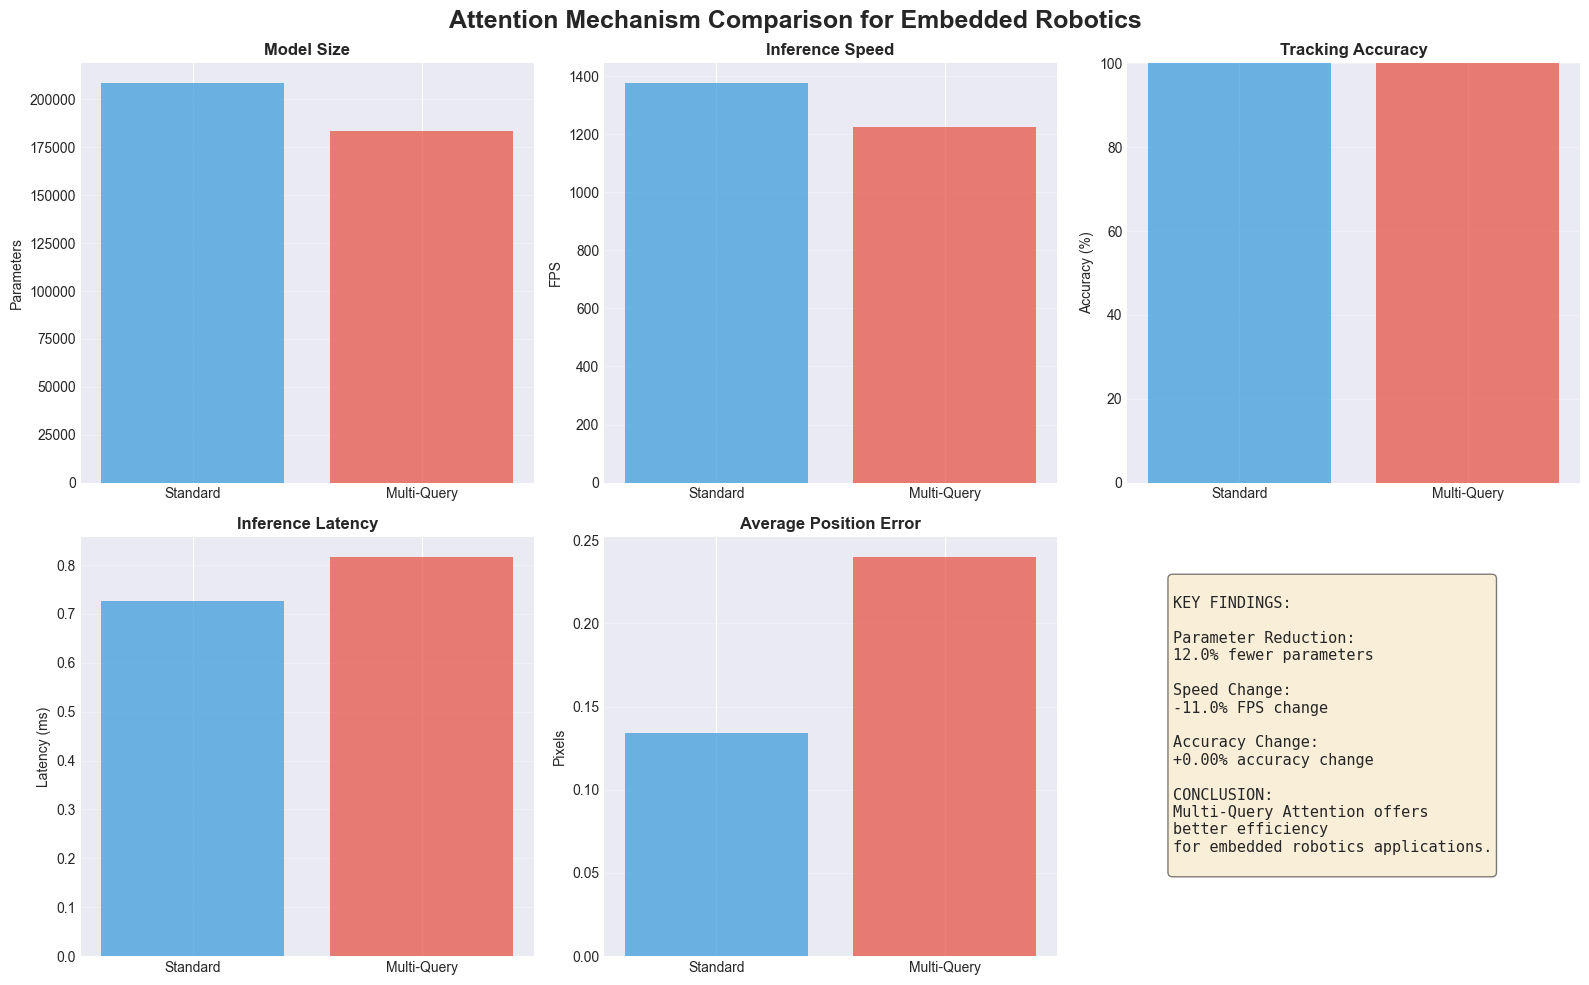

✓ Comprehensive comparison figure saved!


In [25]:
# Create a single comprehensive figure with all comparisons
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Attention Mechanism Comparison for Embedded Robotics', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Parameters
ax1 = plt.subplot(2, 3, 1)
models = ['Standard', 'Multi-Query']
params = [baseline_results['num_parameters'], mq_results['num_parameters']]
ax1.bar(models, params, color=['#3498db', '#e74c3c'], alpha=0.7)
ax1.set_ylabel('Parameters')
ax1.set_title('Model Size', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. FPS
ax2 = plt.subplot(2, 3, 2)
fps_values = [baseline_results['fps'], mq_results['fps']]
ax2.bar(models, fps_values, color=['#3498db', '#e74c3c'], alpha=0.7)
ax2.set_ylabel('FPS')
ax2.set_title('Inference Speed', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Accuracy
ax3 = plt.subplot(2, 3, 3)
accuracy_values = [baseline_results['accuracy_percent'], mq_results['accuracy_percejt']]
ax3.bar(models, accuracy_values, color=['#3498db', '#e74c3c'], alpha=0.7)
ax3.set_ylabel('Accuracy (%)')
ax3.set_title('Tracking Accuracy', fontweight='bold')
ax3.set_ylim([0, 100])
ax3.grid(axis='y', alpha=0.3)

# 4. Latency
ax4 = plt.subplot(2, 3, 4)
latency_values = [baseline_results['latency_ms'], mq_results['latency_ms']]
ax4.bar(models, latency_values, color=['#3498db', '#e74c3c'], alpha=0.7)
ax4.set_ylabel('Latency (ms)')
ax4.set_title('Inference Latency', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. Average Error
ax5 = plt.subplot(2, 3, 5)
error_values = [baseline_results['avg_error_pixels'], mq_results['avg_error_pixels']]
ax5.bar(models, error_values, color=['#3498db', '#e74c3c'], alpha=0.7)
ax5.set_ylabel('Pixels')
ax5.set_title('Average Position Error', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 6. Summary text
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary_text = f"""
KEY FINDINGS:

Parameter Reduction:
{((1 - mq_results['num_parameters']/baseline_results['num_parameters']) * 100):.1f}% fewer parameters

Speed Change:
{((mq_results['fps'] - baseline_results['fps']) / baseline_results['fps'] * 100):+.1f}% FPS change

Accuracy Change:
{(mq_results['accuracy_percejt'] - baseline_results['accuracy_percent']):+.2f}% accuracy change

CONCLUSION:
Multi-Query Attention offers
{'better' if mq_results['num_parameters'] < baseline_results['num_parameters'] else 'similar'} efficiency
for embedded robotics applications.
"""

ax6.text(0.1, 0.9, summary_text, transform=ax6.transAxes,
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../results/figures/comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comprehensive comparison figure saved!")